     dewptc  hum  wndspd  pressure  rain  smoke  temp
0        28   59      20      1008     0      0    20
1        48   61      10      1012     1      0    21
2        24   53       3      1001     0      0    16
3        17   54       8      1002     0      0    16
4        27   51       5      1007     0      0    14
..      ...  ...     ...       ...   ...    ...   ...
995      46   51      14       998     0      1    15
996      40   54      12      1012     0      1    16
997      27   51      13      1021     0      0    15
998      38   48      15      1006     1      1    13
999      38   96      17      1005     1      0    30

[1000 rows x 7 columns]


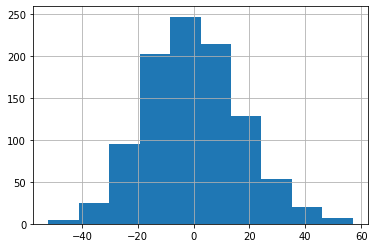

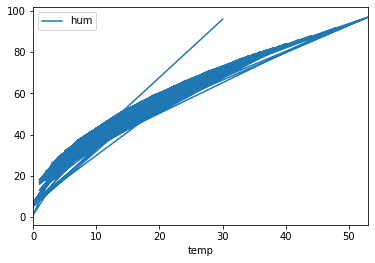

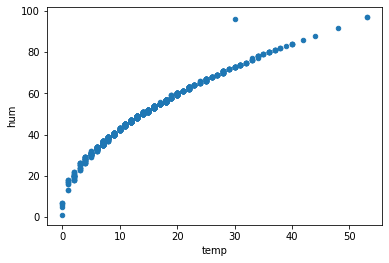

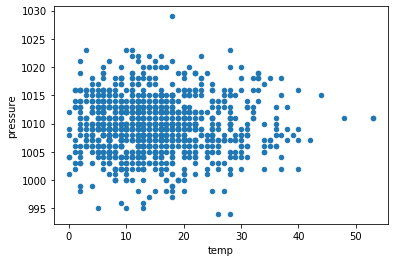

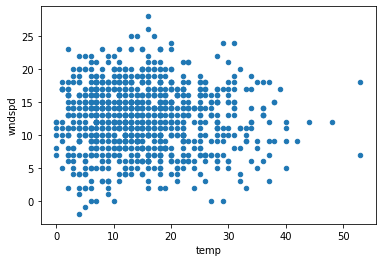

In [200]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt

df = pd.read_csv('weather_data.csv')

#Rearranging columns in the input

cols = df.columns.tolist()

print(df)
df['dewptc'].diff().hist()
df.plot(x='temp',y='hum')
df.plot.scatter(x='temp',y='hum')
df.plot.scatter(x='temp',y='pressure')
df.plot.scatter(x='temp',y='wndspd')

In [270]:
#Linear Regression

#randomize indices, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

In [271]:
train_df.head()

,index,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,920,41,74,19,1004,1,0,31
1,485,36,49,18,1008,0,0,13
2,614,50,53,21,1006,0,1,16
3,475,25,30,10,1011,0,0,5
4,802,13,35,13,1009,1,0,7


In [272]:
test_df.head()

,index,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,984,33,58,20,1012,0,0,19
1,861,22,60,12,1007,1,1,20
2,464,39,56,21,1009,0,0,18
3,855,22,35,12,1011,0,0,7
4,183,37,52,10,1010,0,0,15


In [273]:
x_train = train_df.iloc[:,1:7]
y_train = train_df.iloc[:,7]

x_test = test_df.iloc[:,1:7]
y_test = test_df.iloc[:,7]

#augmenting data to include constant term
x_train['ones'] = 1
x_test['ones'] = 1

# x_train['dewptc'] = (x_train['dewptc']-x_train['dewptc'].mean())/(x_train['dewptc'].std())
# x_train['hum'] = (x_train['hum']-x_train['hum'].mean())/(x_train['hum'].std())
# x_train['wndspd'] = (x_train['wndspd']-x_train['wndspd'].mean())/(x_train['wndspd'].std())
# x_train['pressure'] = (x_train['pressure']-x_train['pressure'].mean())/(x_train['pressure'].std())
# normalizing columns
for col in ['dewptc', 'hum', 'wndspd', 'pressure']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())

print(x_train.head())
print(y_train.head())

     dewptc       hum    wndspd  pressure  rain  smoke  ones
0  0.929583  1.612324  1.371618 -1.136243     1      0     1
1  0.522840 -0.045471  1.162256 -0.314792     0      0     1
2  1.661721  0.219776  1.790341 -0.725517     0      1     1
3 -0.371996 -1.305395 -0.512637  0.301297     0      0     1
4 -1.348180 -0.973836  0.115448 -0.109429     1      0     1
0    31
1    13
2    16
3     5
4     7
Name: temp, dtype: int64


In [290]:
#undifferentiated cost function: 1/2*X.shape[0]*(h(x)-y)'(h(x) - y)
#update rule: w_i = w_i - a*[1/X.shape[0]*sum(h(x_i) - y_i)*x_i - 2*L*w_i]
def cost_regularized(y_pred, y_true, lam, lam2, W, regulariser):
#     if(regulariser == '0'):
    return np.linalg.norm(y_pred-y_true).mean() + lam*(np.linalg.norm(W))
#     elif(regulariser == '1'):
#         return np.linalg.norm(y_pred-y_true).mean() + lam*(np.sum(np.abs(W)))
#     else:
#         return np.linalg.norm(y_pred-y_true).mean() + lam*(np.linalg.norm(W)) + lam2*np.sum(np.abs(W))
    
def calc_gradient(regulariser, h_x_train, X_train, Y_train, lam, lam2, W):
#     if(regulariser == '0'):
    return (((X_train.T).dot(h_x_train - Y_train))/X_train.shape[0]) + 2*lam*W
#     elif(regulariser == '1'):
#         W_diff = np.zeros(W.shape)
#         for i in range(len(W)):
#             if(W[i] > 0):
#                 W_diff[i] = 1
#             elif(W[i] < 0):
#                 W_diff[i] = -1
#             else:
#                 W_diff[i] = 0
#         return np.transpose(np.matmul(h_x_train - Y_train,X_train.T)) + lam*W_diff
#     elif(regulariser == '2'):
#         W_diff = np.zeros(W.shape)
#         for i in range(len(W)):
#             if(W[i] > 0):
#                 W_diff[i] = 1
#             elif(W[i] < 0):
#                 W_diff[i] = -1
#             else:
#                 W_diff[i] = 0
#         return np.transpose(np.matmul(h_x_train - Y_train,X_train.T)) + 2*lam*W + lam2*W_diff
        
        
    
def gd_sq_reg(W, X_train, X_test, Y_train, Y_test, num_iter,alpha,lam, lam2, regulariser):
    train_loss, test_loss = [], []
    
    for i in range(0,num_iter):

#         outputs
        h_x_train = X_train.dot(W)
        h_x_test = X_test.dot(W)
#         gradients
        gradient = calc_gradient(regulariser, h_x_train, X_train, Y_train, lam, lam2, W)
#         step
        W = W - alpha*gradient
    
        train_loss.append(cost_regularized(h_x_train, Y_train, lam, lam2, W, regulariser))
        test_loss.append(cost_regularized(h_x_test, Y_test, lam, lam2, W, regulariser))
    return W, train_loss, test_loss

X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
print('shape of X_train =', X_train.shape)
W = np.random.random((X_train.shape[1],1))
print('shape of W =',W.shape)
Y_train = np.transpose(y_train.to_numpy()).reshape((-1, 1))
Y_test = np.transpose(y_test.to_numpy()).reshape((-1, 1))
print('shape of Y_train =', Y_train.shape)
num_iter = 1000
alpha = 0.01
lam = 0.01
lam2 = 0.001

W, train_loss, test_loss= gd_sq_reg(W,X_train, X_test, Y_train, Y_test, num_iter,alpha,0,0, '0')

print(W)

shape of X_train = (700, 7)
shape of W = (7, 1)
shape of Y_train = (700, 1)
[[ 0.04444421]
 [ 7.4192927 ]
 [-0.09006484]
 [-0.06913243]
 [ 3.35647148]
 [ 0.75047529]
 [13.67955869]]


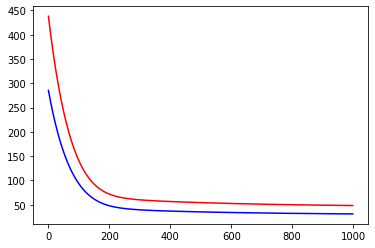

In [291]:
plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

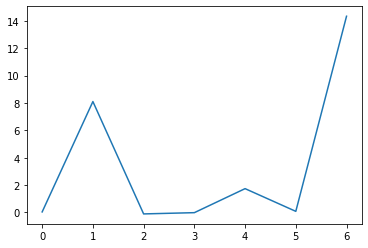

In [235]:
plt.plot(W)
plt.show()